四、图像特征与目标检测

目录

1. 图像特征理解
2. 形状特征
    - Harris
    - HOG 原理
    - SIFT
- 纹理特征
    - LBP
- 模版匹配
- 人脸检测
- 行人检测

1.Hog特征

In [2]:
import cv2
import numpy as np
# 判断矩形i是否完全包含在矩形o中
def is_inside(o, i):
    ox, oy, ow, oh = o
    ix, iy, iw, ih = i
    return ox > ix and oy > iy and ox + ow < ix + iw and oy + oh < iy + ih
# 对人体绘制颜色框
def draw_person(image, person):
    x, y, w, h = person
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
img = cv2.imread("images/people.jpg")
hog = cv2.HOGDescriptor()  # 启动检测器对象
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())  # 指定检测器类型为人体
found, w = hog.detectMultiScale(img,0.1,(2,2)) # 加载并检测图像
print(found)
print(w)

# 丢弃某些完全被其它矩形包含在内的矩形
found_filtered = []
for ri, r in enumerate(found):
    for qi, q in enumerate(found):
        if ri != qi and is_inside(r, q):
            break
    else:
        found_filtered.append(r)
        print(found_filtered)
# 对不包含在内的有效矩形进行颜色框定
for person in found_filtered:
    draw_person(img, person)
cv2.imshow("people detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[322 123  92 184]
 [228 106  94 188]
 [ 97 109  92 184]
 [157 143  89 178]]
[[1.65200863]
 [1.38857948]
 [2.16342618]
 [1.30450142]]
[array([322, 123,  92, 184], dtype=int32)]
[array([322, 123,  92, 184], dtype=int32), array([228, 106,  94, 188], dtype=int32)]
[array([322, 123,  92, 184], dtype=int32), array([228, 106,  94, 188], dtype=int32), array([ 97, 109,  92, 184], dtype=int32)]
[array([322, 123,  92, 184], dtype=int32), array([228, 106,  94, 188], dtype=int32), array([ 97, 109,  92, 184], dtype=int32), array([157, 143,  89, 178], dtype=int32)]


2.Harris角点检测

C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


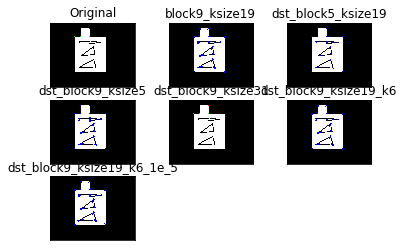

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/harris2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst_block9_ksize19 = cv2.cornerHarris(gray, 9, 19, 0.04)
img1 = np.copy(img)
img1[dst_block9_ksize19 > 0.01 * dst_block9_ksize19.max()] = [0, 0, 255]

dst_block5_ksize19 = cv2.cornerHarris(gray, 5, 19, 0.04)
img2 = np.copy(img)
img2[dst_block5_ksize19 > 0.01 * dst_block5_ksize19.max()] = [0, 0, 255]

dst_block9_ksize5 = cv2.cornerHarris(gray, 9, 5, 0.04)
img3 = np.copy(img)
img3[dst_block9_ksize5 > 0.01 * dst_block9_ksize5.max()] = [0, 0, 255]

dst_block9_ksize31 = cv2.cornerHarris(gray, 9, 31, 0.04)
img4 = np.copy(img)
img4[dst_block9_ksize31 > 0.01 * dst_block9_ksize31.max()] = [0, 0, 255]

dst_block9_ksize19_k6 = cv2.cornerHarris(gray, 9, 19, 0.06)
img5 = np.copy(img)
img5[dst_block9_ksize19_k6 > 0.01 * dst_block9_ksize19_k6.max()] = [0, 0, 255]

dst_block9_ksize19_k6_1e_5 = cv2.cornerHarris(gray, 9, 19, 0.06)
img6 = np.copy(img)
img6[dst_block9_ksize19_k6_1e_5 > 0.00001 * dst_block9_ksize19_k6_1e_5.max()] = [0, 0, 255]

titles = ["Original", "block9_ksize19", "dst_block5_ksize19", "dst_block9_ksize5", "dst_block9_ksize31",
          "dst_block9_ksize19_k6", "dst_block9_ksize19_k6_1e_5"]
imgs = [img, img1, img2, img3, img4, img5, img6]
for i in range(len(titles)):
    plt.subplot(3, 3, i + 1), plt.imshow(imgs[i]), plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
# cv2.imshow('src',img)
# cv2.imshow('dst',img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

3.Harris角点检测

In [3]:
# -*- coding: utf-8 -*-


import cv2
import numpy as np


filename = 'images/harris2.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# 输入图像必须是 float32 ,最后一个参数在 0.04 到 0.06 之间
dst = cv2.cornerHarris(gray,2,3,0.06)

#结果进行膨胀，可有可无
dst = cv2.dilate(dst,None)
print(dst)
# 设定阈值，不同图像阈值不同
img[dst>0.01*dst.max()]=[0,0,255]
print(dst.max())
cv2.imshow('dst_img',img)
#cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
533091900.0


4.SIFT算法

In [14]:
import cv2
import numpy as np


img = cv2.imread('images/harris2.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)#找到关键点
img=cv2.drawKeypoints(gray,kp,img)#绘制关键点
cv2.imshow('sp',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(3.4.9) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


5.LBP特征

In [3]:
def LBP(src):
    '''
    :param src:灰度图像
    :return:
    '''
    height = src.shape[0]
    width = src.shape[1]
    dst = src.copy()
    lbp_value = np.zeros((1,8), dtype=np.uint8)
    #print(lbp_value)
    neighbours = np.zeros((1,8), dtype=np.uint8)
    #print(neighbours)
    for x in range(1, width-1):
        for y in range(1, height-1):
            neighbours[0, 0] = src[y - 1, x - 1]
            neighbours[0, 1] = src[y - 1, x]
            neighbours[0, 2] = src[y - 1, x + 1]
            neighbours[0, 3] = src[y, x - 1]
            neighbours[0, 4] = src[y, x + 1]
            neighbours[0, 5] = src[y + 1, x - 1]
            neighbours[0, 6] = src[y + 1, x]
            neighbours[0, 7] = src[y + 1, x + 1]
            center = src[y, x]
            for i in range(8):
                if neighbours[0, i] > center:
                    lbp_value[0, i] = 1
                else:
                    lbp_value[0, i] = 0

            lbp = lbp_value[0, 0] * 1 + lbp_value[0, 1] * 2 + lbp_value[0, 2] * 4 + lbp_value[0, 3] * 8 \
                + lbp_value[0, 4] * 16 + lbp_value[0, 5] * 32 + lbp_value[0, 6] * 64 + lbp_value[0, 7] * 128
            
            #print(lbp)
            dst[y, x] = lbp

    return dst

In [4]:
import cv2
import numpy as np
img = cv2.imread('images/people.jpg',0)
print(img.shape)
cv2.imshow('src',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
new_img = LBP(img)

cv2.imshow('dst',new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(334, 500)


6.模板匹配

In [5]:
#模板匹配
import cv2
import numpy as np
def template_demo(tpl,target):

    methods = [cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF_NORMED]   #3种模板匹配方法
    th, tw = tpl.shape[:2]
    for md in methods:
        #print(md)
        result = cv2.matchTemplate(target, tpl, md)
        #print(result.shape)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        print(min_val, max_val, min_loc, max_loc)
        if md == cv2.TM_SQDIFF_NORMED:
            tl = min_loc
        else:
            tl = max_loc
        br = (tl[0]+tw, tl[1]+th)   #br是矩形右下角的点的坐标
        cv2.rectangle(target, tl, br, (0, 0, 255), 2)
        cv2.namedWindow("match-" + np.str(md), cv2.WINDOW_NORMAL)
        cv2.imshow("match-" + np.str(md), target)
        
tpl =cv2.imread("images/sample2.jpg")
print(tpl.shape)
target = cv2.imread("images/target1.jpg")
print(target.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.namedWindow('template image', cv2.WINDOW_NORMAL)
cv2.imshow("template image", tpl)
cv2.namedWindow('target image', cv2.WINDOW_NORMAL)
cv2.imshow("target image", target)
template_demo(tpl,target)
cv2.waitKey(0)
cv2.destroyAllWindows()

(136, 92, 3)
(643, 903, 3)
0.313273549079895 1.0 (164, 186) (61, 0)
0.39695343375205994 0.8127202391624451 (232, 111) (164, 186)
-0.3538476526737213 0.5110524296760559 (356, 64) (164, 186)


7.人脸检测方法1

In [20]:
import cv2

# 读入图像
img = cv2.imread("images/3.png")

# 加载人脸特征，该文件在 python安装目录\Lib\site-packages\cv2\data 下
face_cascade = cv2.CascadeClassifier(r'haarcascade_frontalface_default.xml')
# 将读取的图像转为COLOR_BGR2GRAY，减少计算强度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 检测出的人脸个数
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.15, minNeighbors = 4, minSize = (5, 5))

print("Face : {0}".format(len(faces)))
print(faces)
# 用矩形圈出人脸的位置
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) 

cv2.namedWindow("Faces")
cv2.imshow("Faces", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Face : 1
[[ 68  35 249 249]]


8.人脸检测方法2

In [21]:
# -*- coding：utf-8 -*-
import cv2
import dlib
import numpy as np


predictor_model = 'shape_predictor_68_face_landmarks/shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_model)

# cv2读取图像
test_film_path = "3.png"
img = cv2.imread(test_film_path)
# 取灰度
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 人脸数rects
rects = detector(img_gray, 0)
print(rects[0])
for i in range(len(rects)):
    landmarks = np.matrix([[p.x, p.y] for p in predictor(img,rects[i]).parts()])
    print(landmarks, type(landmarks))
    for idx, point in enumerate(landmarks):
        # 68点的坐标
        pos = (point[0, 0], point[0, 1])
        #print(idx+1, pos)

        # 利用cv2.circle给每个特征点画一个圈，共68个
        cv2.circle(img, pos, 3, color=(0, 255, 0))
        # 利用cv2.putText输出1-68
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(idx+1), pos, font, 0.5, (0, 0, 25 5), 1, cv2.LINE_AA)

#cv2.imwrite("result.png", img)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows() 


[(90, 66) (305, 281)]
[[ 95 137]
 [ 98 162]
 [104 187]
 [108 212]
 [117 235]
 [131 255]
 [149 272]
 [170 285]
 [192 289]
 [215 285]
 [235 270]
 [253 251]
 [266 229]
 [272 205]
 [276 180]
 [283 156]
 [285 131]
 [101 114]
 [116 106]
 [134 107]
 [153 110]
 [172 117]
 [209 117]
 [227 109]
 [246 106]
 [265 105]
 [282 113]
 [190 135]
 [191 153]
 [191 172]
 [192 189]
 [177 199]
 [184 203]
 [192 205]
 [201 203]
 [208 199]
 [125 135]
 [136 127]
 [151 127]
 [163 139]
 [149 143]
 [135 143]
 [219 138]
 [230 127]
 [245 126]
 [257 134]
 [247 142]
 [232 142]
 [161 235]
 [172 226]
 [185 219]
 [193 222]
 [200 219]
 [212 226]
 [224 235]
 [213 247]
 [201 252]
 [193 252]
 [184 252]
 [172 247]
 [168 235]
 [185 231]
 [193 232]
 [200 232]
 [217 235]
 [201 235]
 [193 236]
 [185 235]] <class 'numpy.matrix'>
